<a href="https://colab.research.google.com/github/JohnnyAliyev/JohnnyAliyev-github.io/blob/main/3_CrimeTrend_Forecasting_with_Facebook_Prophet_Analyzing_Chicago's_Criminal_Data_(2001_Present).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#284b50; overflow:hidden"><b>CrimeTrend Forecasting with Facebook Prophet: Analyzing Chicago's Criminal Data (2001-Present).</b></div>


# *1. Overview*

 ### This project utilizes Facebook Prophet to analyze and forecast crime trends in Chicago using data from 2001 to the present. By applying this powerful time series forecasting tool, the project aims to identify patterns and predict future crime rates, providing valuable insights for policy makers and law enforcement agencies.

 ### data source :  https://www.kaggle.com/datasets/utkarshx27/crimes-2001-to-present

# *2. Import Dataset*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [ ]:
chicago_df_1=pd.read_csv('/Users/maegbug/Desktop/Crimes_-_2001_to_Present.csv')

In [ ]:
chicago_df_1.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,8.120966e+06,8.120966e+06,8.120919e+06,7.506137e+06,7.507513e+06,8.031415e+06,8.031415e+06,8.120966e+06,8.031415e+06,8.031415e+06
mean,7.284682e+06,1.184859e+03,1.129795e+01,2.277234e+01,3.742549e+01,1.164624e+06,1.885856e+06,2.010501e+03,4.184238e+01,-8.767141e+01
std,3.650072e+06,7.035300e+02,6.959365e+00,1.385542e+01,2.154710e+01,1.697805e+04,3.246787e+04,6.690814e+00,8.933176e-02,6.151556e-02
min,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,3.922481e+06,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.153022e+06,1.859129e+06,2.005000e+03,4.176883e+01,-8.771351e+01
50%,7.280510e+06,1.034000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166160e+06,1.890860e+06,2.009000e+03,4.185618e+01,-8.766571e+01
75%,1.055372e+07,1.731000e+03,1.700000e+01,3.400000e+01,5.700000e+01,1.176389e+06,1.909370e+06,2.016000e+03,4.190700e+01,-8.762812e+01
max,1.354909e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.024000e+03,4.202291e+01,-8.752453e+01


#

# *3 Data Exploration and Cleaning*

<Axes: >

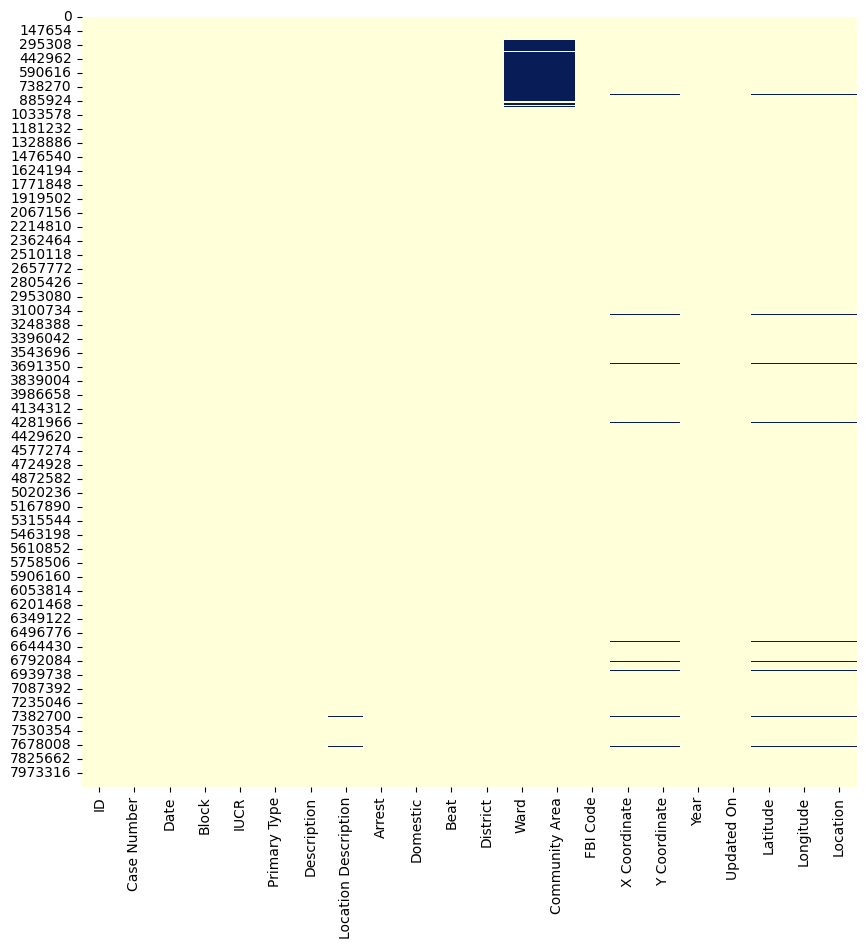

In [ ]:
# Let's see how many null elements are contained in the data
plt.figure(figsize=(10,10))
sns.heatmap(chicago_df_1.isnull(), cbar = False, cmap = 'YlGnBu')

In [ ]:
# ID Case Number Date Block IUCR Primary Type Description Location Description Arrest Domestic Beat District Ward Community Area FBI Code X Coordinate Y Coordinate Year Updated On Latitude Longitude Location
chicago_df_1.drop(['ID', 'Case Number', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location', 'District', 'Latitude' , 'Longitude'], inplace=True, axis=1)

In [ ]:
chicago_df_1.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,ASSAULT,SIMPLE,OTHER,False,False
1,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False
2,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False
3,11/09/2023 07:30:00 AM,019XX W BYRON ST,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False
4,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False


In [ ]:
# Assembling a datetime by rearranging the dataframe column "Date".

chicago_df_1.Date = pd.to_datetime(chicago_df_1.Date, format='%m/%d/%Y %I:%M:%S %p')


In [ ]:
# setting the index to be the date  * important
chicago_df_1.index = pd.DatetimeIndex(chicago_df_1.Date)


In [ ]:
chicago_df_1.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2007-08-25 09:22:18,2007-08-25 09:22:18,074XX N ROGERS AVE,ASSAULT,SIMPLE,OTHER,False,False
2021-05-24 15:06:00,2021-05-24 15:06:00,020XX N LARAMIE AVE,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False
2021-06-26 09:24:00,2021-06-26 09:24:00,062XX N MC CORMICK RD,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False
2023-11-09 07:30:00,2023-11-09 07:30:00,019XX W BYRON ST,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False
2023-11-12 07:59:00,2023-11-12 07:59:00,086XX S COTTAGE GROVE AVE,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False


In [ ]:
chicago_df_1['Primary Type'].value_counts()

Primary Type
THEFT                                1717161
BATTERY                              1481194
CRIMINAL DAMAGE                       924952
NARCOTICS                             755019
ASSAULT                               536983
OTHER OFFENSE                         504535
BURGLARY                              433971
MOTOR VEHICLE THEFT                   408338
DECEPTIVE PRACTICE                    367590
ROBBERY                               305879
CRIMINAL TRESPASS                     220287
WEAPONS VIOLATION                     117235
PROSTITUTION                           70112
OFFENSE INVOLVING CHILDREN             58251
PUBLIC PEACE VIOLATION                 53498
SEX OFFENSE                            32542
CRIM SEXUAL ASSAULT                    27462
INTERFERENCE WITH PUBLIC OFFICER       19175
LIQUOR LAW VIOLATION                   15144
GAMBLING                               14640
ARSON                                  13904
HOMICIDE                               133

In [ ]:
# top 15
chicago_df_1['Primary Type'].value_counts().iloc[:15]

Primary Type
THEFT                         1717161
BATTERY                       1481194
CRIMINAL DAMAGE                924952
NARCOTICS                      755019
ASSAULT                        536983
OTHER OFFENSE                  504535
BURGLARY                       433971
MOTOR VEHICLE THEFT            408338
DECEPTIVE PRACTICE             367590
ROBBERY                        305879
CRIMINAL TRESPASS              220287
WEAPONS VIOLATION              117235
PROSTITUTION                    70112
OFFENSE INVOLVING CHILDREN      58251
PUBLIC PEACE VIOLATION          53498
Name: count, dtype: int64

In [ ]:
order_list=chicago_df_1['Primary Type'].value_counts().iloc[:15].index

In [ ]:
duplicate_labels = chicago_df_1['Primary Type'].duplicated().sum()
print(f"Number of duplicate labels: {duplicate_labels}")


Number of duplicate labels: 8095380


In [ ]:
top_types = chicago_df_1['Primary Type'].value_counts().iloc[:15].index
print(top_types)


Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT',
       'OTHER OFFENSE', 'BURGLARY', 'MOTOR VEHICLE THEFT',
       'DECEPTIVE PRACTICE', 'ROBBERY', 'CRIMINAL TRESPASS',
       'WEAPONS VIOLATION', 'PROSTITUTION', 'OFFENSE INVOLVING CHILDREN',
       'PUBLIC PEACE VIOLATION'],
      dtype='object', name='Primary Type')


In [ ]:
chicago_df_1 = chicago_df_1.reset_index(drop=True)
chicago_df_1 = chicago_df_1.drop_duplicates()
chicago_df_1.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,2007-08-25 09:22:18,074XX N ROGERS AVE,ASSAULT,SIMPLE,OTHER,False,False
1,2021-05-24 15:06:00,020XX N LARAMIE AVE,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False
2,2021-06-26 09:24:00,062XX N MC CORMICK RD,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False
3,2023-11-09 07:30:00,019XX W BYRON ST,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False
4,2023-11-12 07:59:00,086XX S COTTAGE GROVE AVE,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False


/var/folders/ny/6t80lgd179sbyd1ypw2379bc0000gn/T/ipykernel_1682/1098495409.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Primary Type', data=chicago_df_1, order=order_list,color='blue',palette='viridis')


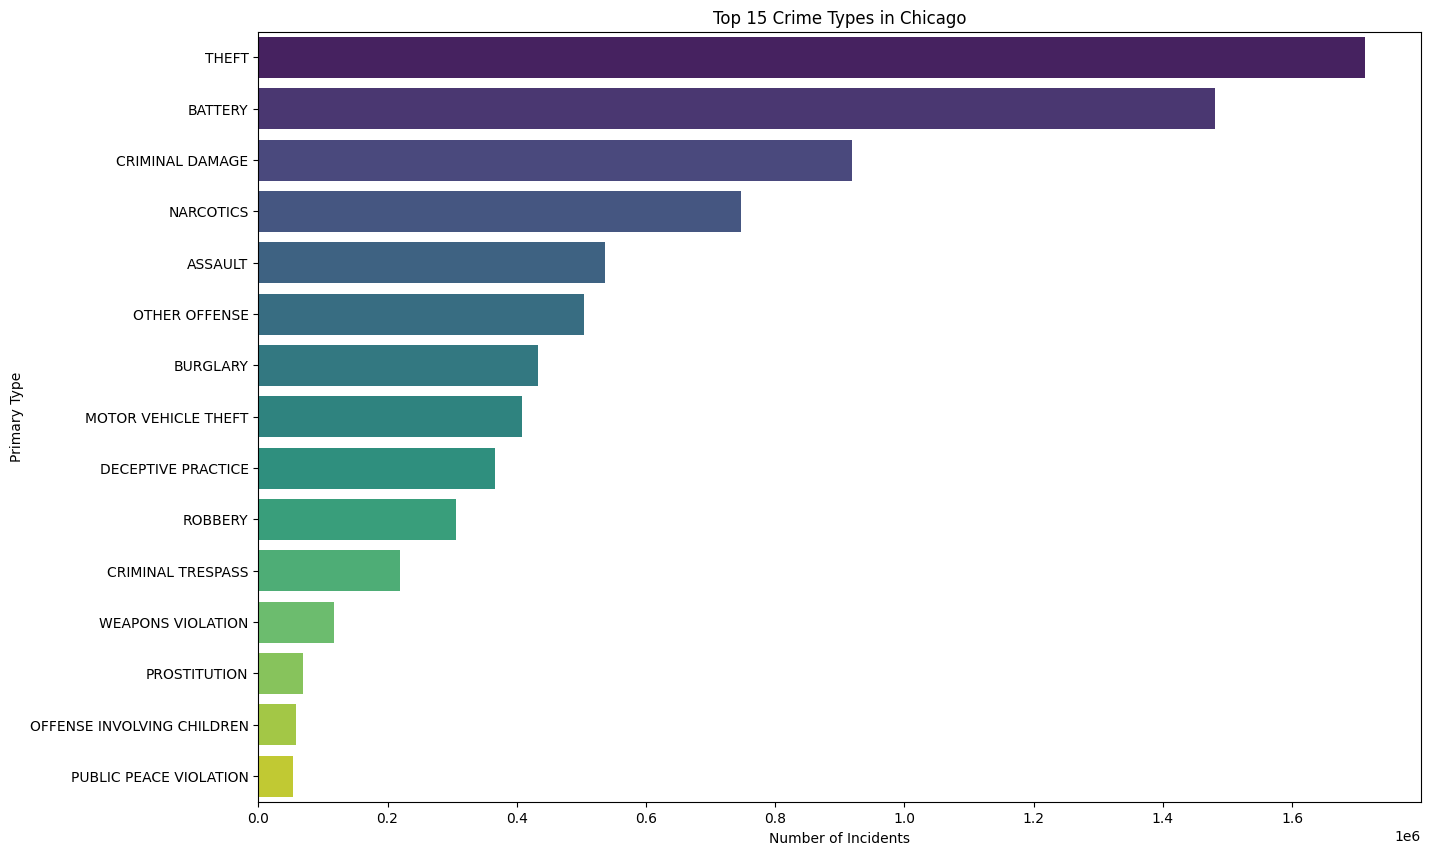

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(y='Primary Type', data=chicago_df_1, order=order_list,color='blue',palette='viridis')
plt.title('Top 15 Crime Types in Chicago')
plt.xlabel('Number of Incidents')
plt.ylabel('Primary Type')
plt.show()


In [ ]:
top_crime_counts=chicago_df_1['Location Description'].value_counts().iloc[:15]

In [ ]:
crime_types=top_crime_counts.index

In [ ]:
counts = top_crime_counts.values

Text(0, 0.5, 'Primary Type')

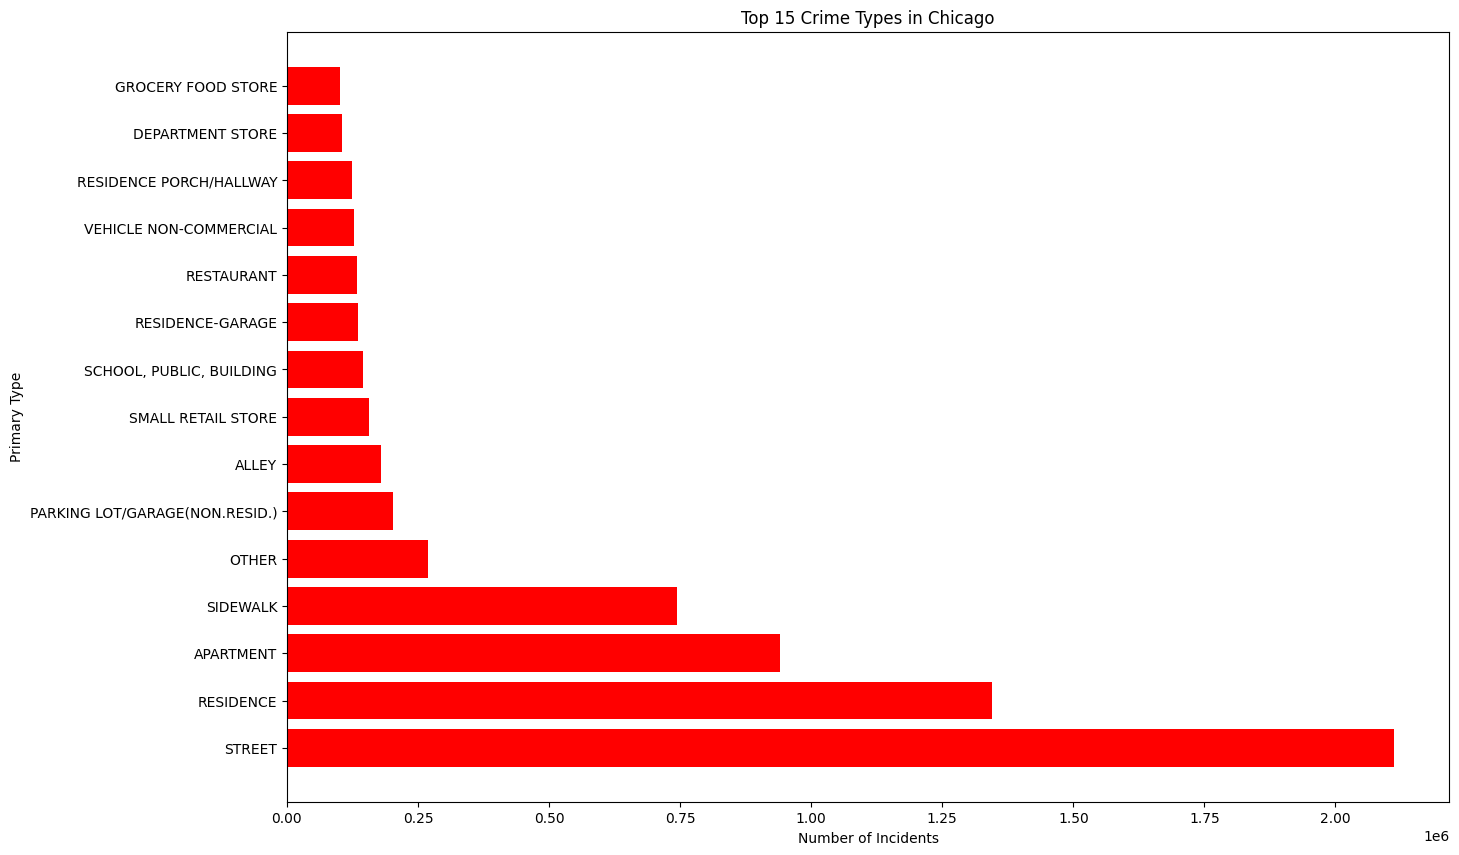

In [ ]:
plt.figure(figsize=(15, 10))
bars = plt.barh(crime_types, counts, color='red')
plt.title('Top 15 Crime Types in Chicago')
plt.xlabel('Number of Incidents')
plt.ylabel('Primary Type')

In [ ]:

chicago_df_1.index = pd.DatetimeIndex(chicago_df_1.Date)
chicago_df_1.resample('Y').size()

Date
2001-12-31    484460
2002-12-31    484943
2003-12-31    473531
2004-12-31    467216
2005-12-31    451747
2006-12-31    445706
2007-12-31    435287
2008-12-31    425921
2009-12-31    391773
2010-12-31    369685
2011-12-31    351233
2012-12-31    335597
2013-12-31    306872
2014-12-31    275279
2015-12-31    264275
2016-12-31    269207
2017-12-31    268540
2018-12-31    268458
2019-12-31    260951
2020-12-31    212069
2021-12-31    208872
2022-12-31    238967
2023-12-31    261761
2024-12-31    143066
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

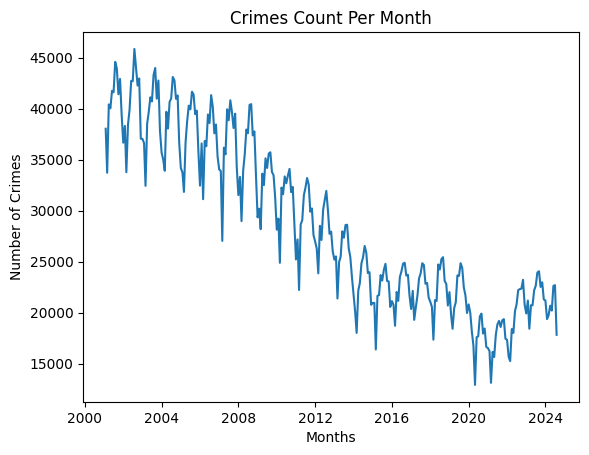

In [ ]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(chicago_df_1.resample('M').size())
plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

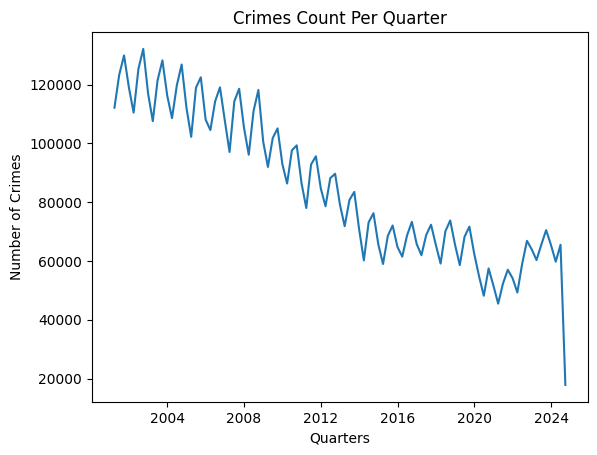

In [ ]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(chicago_df_1.resample('Q').size())
plt.title('Crimes Count Per Quarter')
plt.xlabel('Quarters')
plt.ylabel('Number of Crimes')

#

# *4. Data Preparation*

In [ ]:
chicago_prophet = chicago_df_1.resample('M').size().reset_index()
chicago_prophet.columns = ['Date', 'Crime Count']
chicago_prophet

,Date,Crime Count
0,2001-01-31,38023
1,2001-02-28,33705
2,2001-03-31,40415
3,2001-04-30,40023
4,2001-05-31,41743
...,...,...
278,2024-03-31,20674
279,2024-04-30,20193
280,2024-05-31,22613
281,2024-06-30,22684


In [ ]:
chicago_prophet_df = pd.DataFrame(chicago_prophet)
chicago_prophet_df

,Date,Crime Count
0,2001-01-31,38023
1,2001-02-28,33705
2,2001-03-31,40415
3,2001-04-30,40023
4,2001-05-31,41743
...,...,...
278,2024-03-31,20674
279,2024-04-30,20193
280,2024-05-31,22613
281,2024-06-30,22684


#

# *5. Model Selection and Training*

In [ ]:
chicago_prophet_df.columns

Index(['Date', 'Crime Count'], dtype='object')

In [ ]:
chicago_prophet_df_final = chicago_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})
chicago_prophet_df_final.head()

,ds,y
0,2001-01-31,38023
1,2001-02-28,33705
2,2001-03-31,40415
3,2001-04-30,40023
4,2001-05-31,41743


In [ ]:
m = Prophet()
m.fit(chicago_prophet_df_final)


13:41:24 - cmdstanpy - INFO - Chain [1] start processing
13:41:24 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,41685.054006,36728.002108,40683.613212,41685.054006,41685.054006,-2943.317902,-2943.317902,-2943.317902,-2943.317902,-2943.317902,-2943.317902,0.0,0.0,0.0,38741.736104
1,2001-02-28,41625.606527,34387.802473,38448.735305,41625.606527,41625.606527,-5196.311746,-5196.311746,-5196.311746,-5196.311746,-5196.311746,-5196.311746,0.0,0.0,0.0,36429.294781
2,2001-03-31,41559.789674,38374.424260,42314.922300,41559.789674,41559.789674,-1181.613760,-1181.613760,-1181.613760,-1181.613760,-1181.613760,-1181.613760,0.0,0.0,0.0,40378.175915
3,2001-04-30,41496.095946,38067.093680,42085.821866,41496.095946,41496.095946,-1380.842038,-1380.842038,-1380.842038,-1380.842038,-1380.842038,-1380.842038,0.0,0.0,0.0,40115.253908
4,2001-05-31,41430.279094,40701.855063,44781.509990,41430.279094,41430.279094,1276.027058,1276.027058,1276.027058,1276.027058,1276.027058,1276.027058,0.0,0.0,0.0,42706.306152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,2025-07-27,20184.853675,22665.866059,26704.221097,20106.109211,20262.233704,4548.282115,4548.282115,4548.282115,4548.282115,4548.282115,4548.282115,0.0,0.0,0.0,24733.135790
644,2025-07-28,20184.700317,22290.199706,26309.760404,20105.702875,20262.612937,4182.229539,4182.229539,4182.229539,4182.229539,4182.229539,4182.229539,0.0,0.0,0.0,24366.929856
645,2025-07-29,20184.546959,21793.516003,25817.129256,20105.332119,20262.772271,3750.551430,3750.551430,3750.551430,3750.551430,3750.551430,3750.551430,0.0,0.0,0.0,23935.098390
646,2025-07-30,20184.393601,21350.562410,25493.273707,20105.155998,20263.585200,3255.314942,3255.314942,3255.314942,3255.314942,3255.314942,3255.314942,0.0,0.0,0.0,23439.708543


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


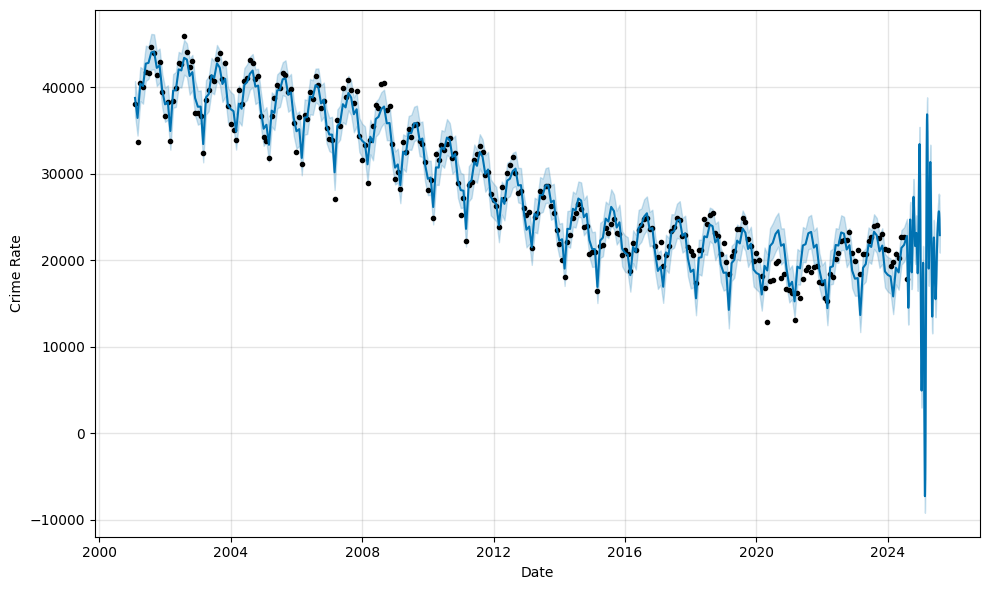

In [ ]:
figure = m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will

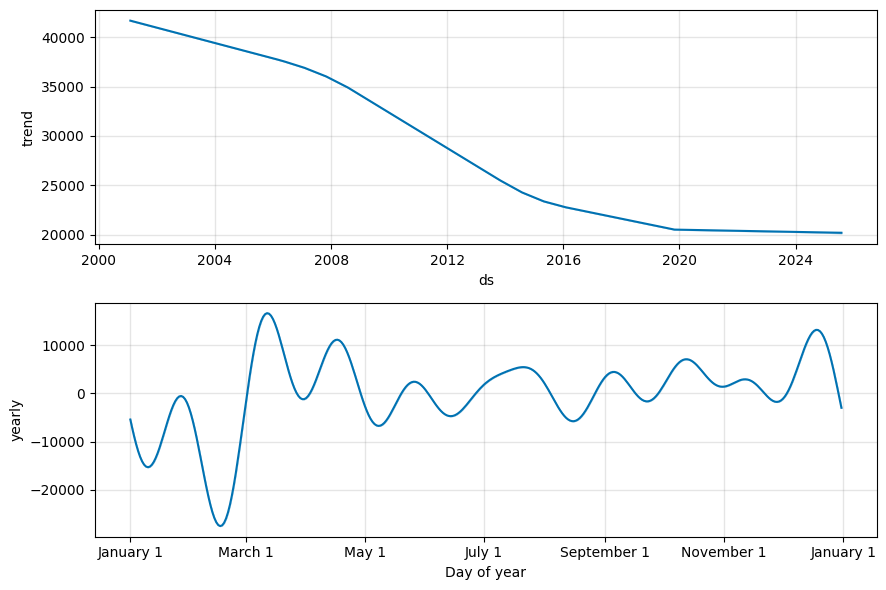

In [ ]:
figure3 = m.plot_components(forecast)
